In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform, normal
import torch
from PIL import Image
import itertools

In [7]:
from numpy.random import default_rng
import cv2
from dataclasses import dataclass

def get_means_positions(n, min_val=0, max_val=256):
    positions = []
    for i in range(n):
        mid_offset = (max_val-min_val) / (2*n)
        segment_start = i * ((max_val - min_val) / n) + min_val
        pos = segment_start + mid_offset
        positions.append(pos)
    return positions

@dataclass
class NormalDistribution:
    loc: float
    scale: float
        
def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result


In [ ]:
get_means_positions(3, max_val=1)

In [ ]:
n_populations = 6
img_w, img_h = 28, 28
import itertools

        
def generate_hsv_samples(n_samples, rng, hue_dist, saturation_dist):
    hue_vals = rng.normal(loc=hue_dist.loc, scale=hue_dist.scale, size=n_samples * img_h * img_w).reshape((n_samples, img_h, img_w))
    hue_vals = np.clip(hue_vals, a_min=0.0, a_max=1.0)
    saturation_vals = rng.normal(loc=saturation_dist.loc, scale=saturation_dist.scale, size=n_samples * img_h * img_w).reshape((n_samples, img_h, img_w))
    saturation_vals = np.clip(saturation_vals, a_min=0.0, a_max=1.0)
    value_vals = np.full((n_samples * img_h * img_w, ), 0.8).reshape((n_samples, img_h, img_w))

    images_hsv = np.moveaxis(np.stack((hue_vals, saturation_vals, value_vals)), 0, -1)
    images = (matplotlib.colors.hsv_to_rgb(images_hsv) * 255).astype(np.uint8)
    return images

#     border_size = 1
#     size = 28 + border_size * 2
#     tiled_imgs = np.ones((10 * size, 10 * size, 3))

#     for i in range(100):
#         im = images[i]
#         r = int(i / 10)
#         c = int(i % 10)
#         constant = cv2.copyMakeBorder(im, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT,
#                                       value=[255, 0, 255])
#         tiled_imgs[r * size:r * size + size, c * size:c * size + size, :] = constant
        
#     img = Image.fromarray(tiled_imgs.astype(np.uint8))
#     img = Image.fromarray(images[0])
#     display(img)

def generate_rgb_samples(n_samples, rng, r_dist, g_dist, b_dist):
    r_vals = rng.normal(loc=r_dist.loc, scale=r_dist.scale, size=n_samples * img_h * img_w).reshape((n_samples, img_h, img_w))
    r_vals = np.clip(r_vals, a_min=0.0, a_max=1.0)
    g_vals = rng.normal(loc=g_dist.loc, scale=g_dist.scale, size=n_samples * img_h * img_w).reshape((n_samples, img_h, img_w))
    g_vals = np.clip(g_vals, a_min=0.0, a_max=1.0)
    b_vals = rng.normal(loc=b_dist.loc, scale=b_dist.scale, size=n_samples * img_h * img_w).reshape((n_samples, img_h, img_w))
    b_vals = np.clip(b_vals, a_min=0.0, a_max=1.0)
    
    images_rgb = np.moveaxis(np.stack((r_vals, g_vals, b_vals)), 0, -1)
    images = (images_rgb * 255).astype(np.uint8)
    return images

rng = default_rng()
    
classes_samples = []
targets = []
n_samples = 1000

r_std = g_std = 0.2
min_val = 0.0
max_val = 0.2

n_classes = 9
n_r = n_g = int(np.ceil(np.sqrt(n_classes)))
r_means = get_means_positions(n_r, min_val=min_val, max_val=max_val)
g_means = get_means_positions(n_g, min_val=min_val, max_val=max_val)
combos = list(itertools.product(r_means, g_means))

print(r_means, g_means)

for i in range(n_classes):
    r_means, n_means = combos[i]
    r_dist = NormalDistribution(r_means, r_std)
    g_dist = NormalDistribution(n_means, g_std)
    b_dist = NormalDistribution(0.5, i * 0.1)
    classes_samples.append(generate_rgb_samples(n_samples, rng, r_dist, g_dist, b_dist))
    targets.extend([i] * n_samples)
        
images = np.concatenate(classes_samples)
targets = np.array(targets)
images.shape, targets.shape

for t in np.unique(targets):
    img = Image.fromarray(images[targets == t][0])
    display(img)


In [ ]:
n_r = 3
r_means = get_means_positions(n_r, max_val=max_val)
n_g = 3
n_means = get_means_positions(n_g, max_val=max_val)
len(list(itertools.product(n_means, r_means)))

In [ ]:
x * y = 9

In [ ]:
N = 8
np.ceil(np.sqrt(N))

In [ ]:
n_samples = 2
value_vals = np.full((n_samples * img_h * img_w,), 0.8).reshape((n_samples, img_h, img_w))
dist = NormalDistribution(0.8, 0.0)
value_vals_2 = rng.normal(loc=dist.loc, scale=dist.scale, size=n_samples * img_h * img_w).reshape(
                (n_samples, img_h, img_w))

np.count_nonzero(value_vals != value_vals_2)

In [ ]:




from PIL import Image

w = 280
h = 280
min_cut=0.20
max_cut=0.80
image = np.uint8(get_gradient_3d(w, h, (0, 0, 0), (255, 0, 255), (False, False, False)))
M = cv2.getRotationMatrix2D((w/2, h/2), 45, 1.0)
image = cv2.warpAffine(image, M, (w, h))
image = image[int(min_cut*h):int(max_cut*h), int(min_cut*w):int(max_cut*w)]
image = cv2.resize(image, (28,28))
img = Image.fromarray(2*image)
display(img)

20.0


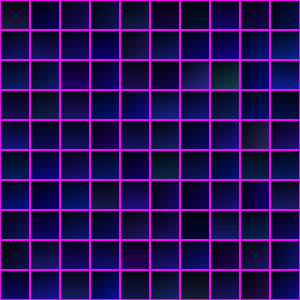

60.0


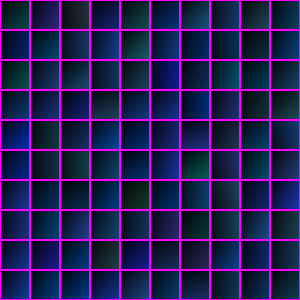

100.0


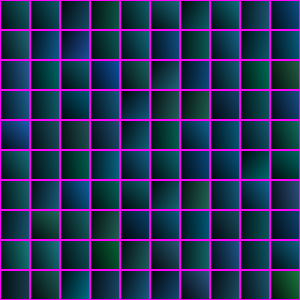

139.99999999999997


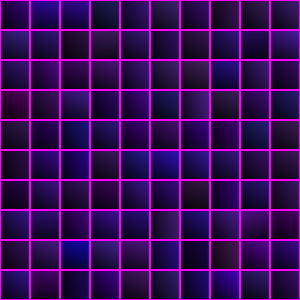

180.0


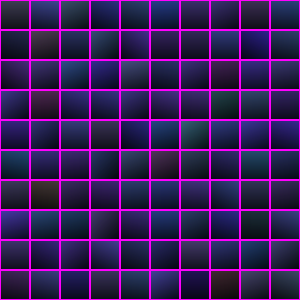

220.00000000000003


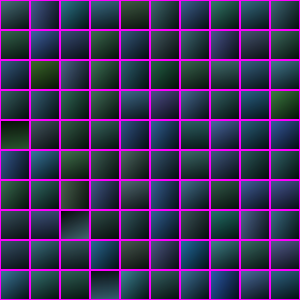

260.0


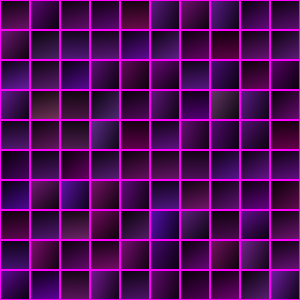

300.0


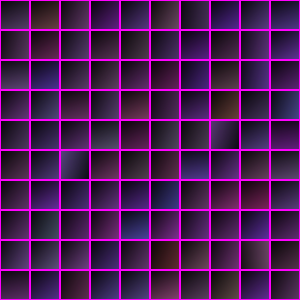

340.0


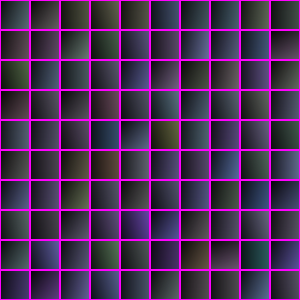

In [25]:
def generate_rgb_gradients(n_samples, rng, r_dist, g_dist, b_dist, rot_dist):
    r_vals = rng.normal(loc=r_dist.loc, scale=r_dist.scale, size=n_samples)
    r_vals = np.clip(r_vals, a_min=0.0, a_max=1.0)
    g_vals = rng.normal(loc=g_dist.loc, scale=g_dist.scale, size=n_samples)
    g_vals = np.clip(g_vals, a_min=0.0, a_max=1.0)
    b_vals = rng.normal(loc=b_dist.loc, scale=b_dist.scale, size=n_samples)
    b_vals = np.clip(b_vals, a_min=0.0, a_max=1.0)
    rotations = rng.normal(loc=rot_dist.loc, scale=rot_dist.scale, size=n_samples)
    rotations = np.clip(rotations, a_min=0.0, a_max=1.0)
    
    colors = np.moveaxis(np.stack((r_vals, g_vals, b_vals)), 0, -1)
    colors = (colors * 255).astype(np.uint8)
    rotations = (rotations * 360).astype(np.uint8)
    
    w = h = 28
    up_w = up_h = 2*w
    min_cut=0.20
    max_cut=0.80
    
    images = []
    for i in range(n_samples):
        image = np.uint8(get_gradient_3d(up_w, up_h, (0, 0, 0), colors[i], (False, False, False)))
        M = cv2.getRotationMatrix2D((up_w / 2, up_h / 2), rotations[i], 1.0)
        image = cv2.warpAffine(image, M, (up_w, up_w))
        image = image[int(min_cut*up_h):int(max_cut*up_h), int(min_cut*up_w):int(max_cut*up_w)]
        image = cv2.resize(image, (w, h))
        images.append(image)
    
    images = np.stack(images)
    return images
    
n_samples = 100
n_classes = 9
r_std = g_std = 0.05
min_val = 0.0
max_val = 0.5
n_r = n_g = int(np.ceil(np.sqrt(n_classes)))
r_means = get_means_positions(n_r, min_val=min_val, max_val=max_val)
g_means = get_means_positions(n_g, min_val=min_val, max_val=max_val)

rot_means = get_means_positions(n_classes, min_val=0, max_val=1)

combos = list(itertools.product(r_means, g_means))

for c in range(n_classes):
    rng = default_rng()
    r_mean, g_mean = combos[c]
    r_dist = NormalDistribution(r_mean, r_std)
    g_dist = NormalDistribution(g_mean, g_std)
    b_dist = NormalDistribution(0.5, 0.1)
    rot_dist = NormalDistribution(rot_means[c], 0.05)
    print(rot_means[c] * 360)
    images = generate_rgb_gradients(n_samples, rng, r_dist, g_dist, b_dist, rot_dist)

    border_size = 1
    size = 28 + border_size * 2
    tiled_imgs = np.ones((10 * size, 10 * size, 3))

    for i in range(100):
        im = images[i]
        r = int(i / 10)
        c = int(i % 10)
        constant = cv2.copyMakeBorder(im, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT,
                                      value=[255, 0, 255])
        tiled_imgs[r * size:r * size + size, c * size:c * size + size, :] = constant

    img = Image.fromarray(tiled_imgs.astype(np.uint8))
    display(img)